<a href="https://colab.research.google.com/github/NAizdabezt/sgu_data_analysit/blob/main/XuLyvaTrucQuanHoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.2. XỬ LÝ VÀ TRỰC QUAN HÓA DỮ LIỆU

## 1.2.1. Ôn tập lý thuyết

Trực quan hóa dữ liệu (Data Visualization) có vai trò quan trọng trong quá trình
phân tích dữ liệu, giúp:

- Hiểu rõ phân bố dữ liệu và phát hiện ngoại lai.
- Nhận diện xu hướng, mẫu và mối quan hệ giữa các biến.
- Giao tiếp kết quả phân tích một cách trực quan, dễ hiểu.

Một số loại biểu đồ phổ biến:
- Histogram: biểu diễn phân bố dữ liệu số.
- Boxplot: phát hiện ngoại lai, mô tả sự phân tán.
- Bar chart: so sánh dữ liệu phân loại.
- Scatter plot: thể hiện mối quan hệ giữa 2 biến số.
- Heatmap: trực quan hóa ma trận tương quan.

Các thư viện Python thường dùng:
- Matplotlib: linh hoạt, tùy biến cao.
- Seaborn: trực quan, dễ dùng cho EDA.
- Plotly: biểu đồ tương tác.

In [ ]:
import pandas as pd

# Danh sách mô tả thủ công cho từng biến
variable_info = {
    "fixed acidity": "Lượng acid cố định (chủ yếu là tartaric acid) trong rượu.",
    "volatile acidity": "Lượng acid bay hơi (acetic acid), cao gây vị chua, mùi khó chịu.",
    "citric acid": "Acid citric – góp phần tạo vị tươi mát, giảm chua gắt.",
    "residual sugar": "Lượng đường còn lại sau quá trình lên men, ảnh hưởng vị ngọt.",
    "chlorides": "Nồng độ muối trong rượu; cao → giảm chất lượng.",
    "free sulfur dioxide": "SO₂ tự do, có vai trò bảo quản, ngăn oxy hóa.",
    "total sulfur dioxide": "Tổng lượng SO₂, cao quá gây mùi khó chịu.",
    "density": "Mật độ của rượu; tỷ lệ thuận với đường, tỷ lệ nghịch với cồn.",
    "pH": "Độ axit tổng thể (thang 0–14), ảnh hưởng vị và ổn định hóa học.",
    "sulphates": "Muối sulfat, góp phần ổn định và tạo hương vị.",
    "alcohol": "Nồng độ cồn (% vol), tăng → chất lượng cao hơn thường.",
    "quality": "Điểm đánh giá cảm quan (thang 0–10)."
}

# Tạo DataFrame mô tả
df_desc = pd.DataFrame(list(variable_info.items()), columns=["Biến", "Mô tả chi tiết"])

# Hiển thị bảng đẹp
pd.set_option('display.max_colwidth', None)
df_desc.style.set_properties(**{
    'background-color': '#f9f9f9',
    'color': 'black',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid',
    'text-align': 'left'
})


,Biến,Mô tả chi tiết
0,fixed acidity,Lượng acid cố định (chủ yếu là tartaric acid) trong rượu.
1,volatile acidity,"Lượng acid bay hơi (acetic acid), cao gây vị chua, mùi khó chịu."
2,citric acid,"Acid citric – góp phần tạo vị tươi mát, giảm chua gắt."
3,residual sugar,"Lượng đường còn lại sau quá trình lên men, ảnh hưởng vị ngọt."
4,chlorides,Nồng độ muối trong rượu; cao → giảm chất lượng.
5,free sulfur dioxide,"SO₂ tự do, có vai trò bảo quản, ngăn oxy hóa."
6,total sulfur dioxide,"Tổng lượng SO₂, cao quá gây mùi khó chịu."
7,density,"Mật độ của rượu; tỷ lệ thuận với đường, tỷ lệ nghịch với cồn."
8,pH,"Độ axit tổng thể (thang 0–14), ảnh hưởng vị và ổn định hóa học."
9,sulphates,"Muối sulfat, góp phần ổn định và tạo hương vị."


In [ ]:
# Kiểm tra giá trị null
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

# Gộp thành bảng
missing_summary = pd.DataFrame({
    "Số giá trị thiếu": missing,
    "Tỷ lệ (%)": round(missing_percent, 2)
})

print("🔍 Bảng kiểm tra dữ liệu thiếu:")
display(missing_summary)



NameError: name 'df' is not defined

##Dataset 1: Red Wine Quality

### Xử lý và trực quan hóa dữ liệu

Bộ dữ liệu **Red Wine Quality** gồm 1.599 mẫu, với 11 đặc trưng hóa học:

- fixed acidity  
- volatile acidity  
- citric acid  
- residual sugar  
- chlorides  
- free sulfur dioxide  
- total sulfur dioxide  
- density  
- pH  
- sulphates  
- alcohol  

Biến mục tiêu: **quality** (điểm số từ 0 đến 10).  

Mục tiêu: Trực quan hóa dữ liệu để hiểu rõ phân bố các biến,
phát hiện đặc trưng quan trọng ảnh hưởng đến chất lượng rượu.


### Code: Đọc dữ liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu rượu đỏ
wine = pd.read_csv("winequality-red.csv")
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Kiểm tra giá trị null
missing = wine.isnull().sum()
missing_percent = (missing / len(wine)) * 100

# Gộp thành bảng
missing_summary = pd.DataFrame({
    "Số giá trị thiếu": missing,
    "Tỷ lệ (%)": round(missing_percent, 2)
})

print("🔍 Bảng kiểm tra dữ liệu thiếu:")
display(missing_summary)

🔍 Bảng kiểm tra dữ liệu thiếu:


,Số giá trị thiếu,Tỷ lệ (%)
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


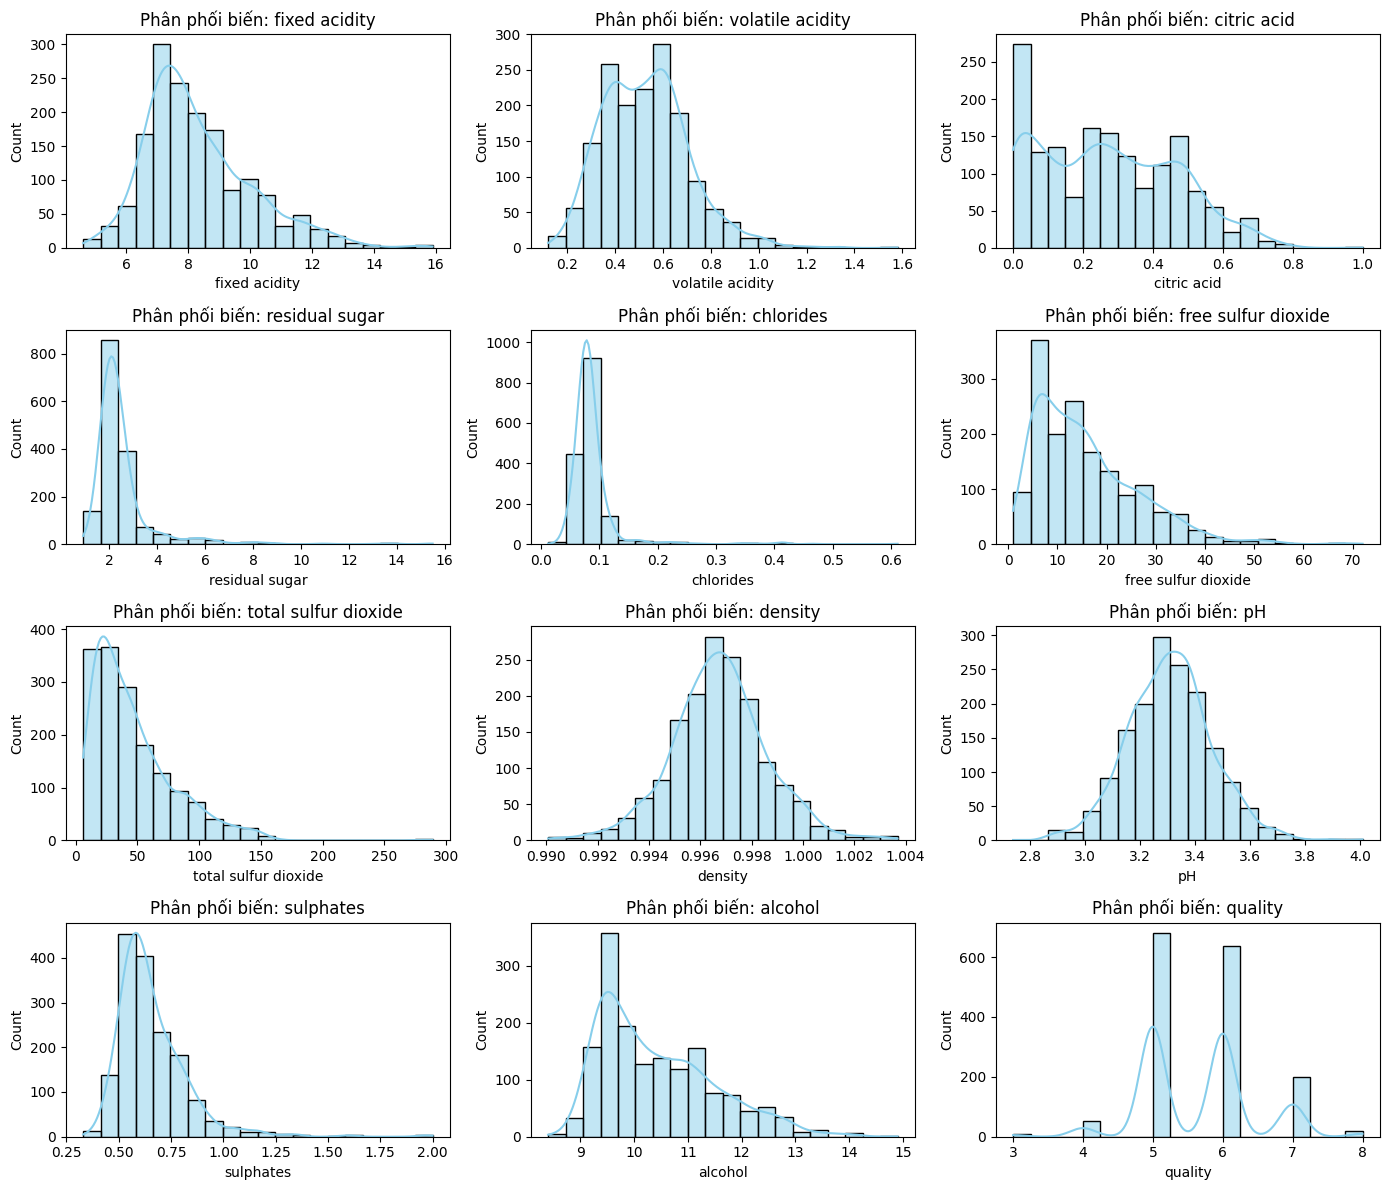

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = wine.select_dtypes(include=['float64', 'int64']).columns  # chỉ lấy cột số

plt.figure(figsize=(14, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(wine[col], kde=True, color='skyblue', bins=20)
    plt.title(f"Phân phối biến: {col}")
plt.tight_layout()
plt.show()


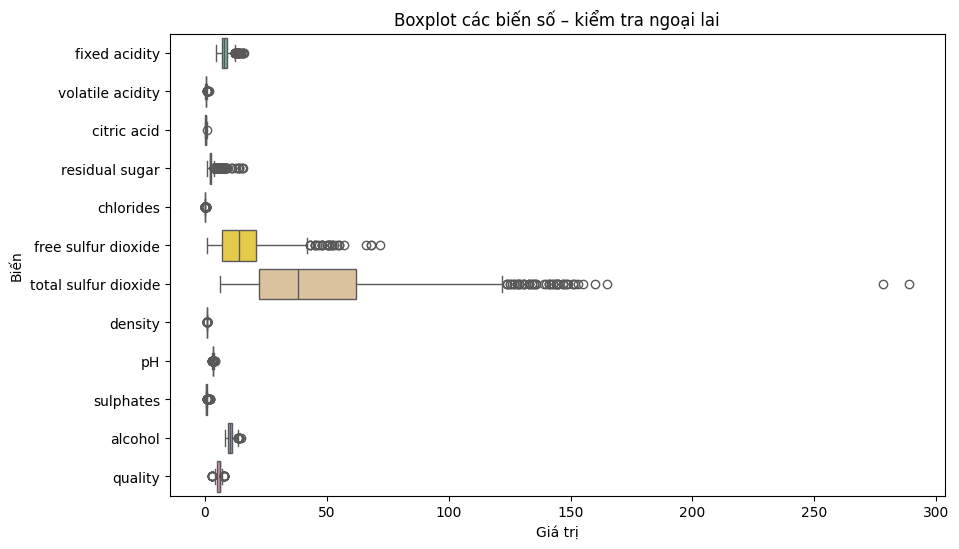

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=wine, orient='h', palette='Set2')
plt.title("Boxplot các biến số – kiểm tra ngoại lai")
plt.xlabel("Giá trị")
plt.ylabel("Biến")
plt.show()


In [ ]:
# Loại bỏ ngoại lai dựa trên IQR cho tất cả các cột số
Q1 = wine[cols].quantile(0.25)
Q3 = wine[cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = wine[~((wine[cols] < (Q1 - 1.5 * IQR)) | (wine[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Số dòng sau khi loại bỏ ngoại lai:", df_clean.shape[0])


Số dòng sau khi loại bỏ ngoại lai: 1179


In [ ]:
summary = df_clean.describe().T
summary["missing(%)"] = (df_clean.isnull().sum() / len(df_clean) * 100).round(2)
display(summary)


,count,mean,std,min,25%,50%,75%,max,missing(%)
fixed acidity,1179.0,8.162002,1.458270,5.10000,7.10000,7.8000,9.0000,12.300,0.0
volatile acidity,1179.0,0.523066,0.164231,0.12000,0.39000,0.5200,0.6300,1.005,0.0
citric acid,1179.0,0.246760,0.179441,0.00000,0.08000,0.2400,0.3900,0.730,0.0
residual sugar,1179.0,2.185411,0.440972,1.20000,1.90000,2.1000,2.5000,3.600,0.0
chlorides,1179.0,0.078586,0.014317,0.04100,0.06900,0.0780,0.0870,0.119,0.0
free sulfur dioxide,1179.0,15.020356,8.792916,1.00000,8.00000,13.0000,20.0000,42.000,0.0
total sulfur dioxide,1179.0,42.268024,26.106438,6.00000,22.00000,36.0000,56.0000,122.000,0.0
density,1179.0,0.996584,0.001593,0.99236,0.99552,0.9966,0.9976,1.001,0.0
pH,1179.0,3.324623,0.131731,2.94000,3.23000,3.3300,3.4100,3.680,0.0
sulphates,1179.0,0.631264,0.116098,0.33000,0.55000,0.6100,0.7000,0.980,0.0


Để thuận tiện cho phân tích trực quan, ta chia chất lượng rượu thành 2 nhóm:

- **Good**: quality >= 7  
- **Bad**: quality < 7

In [ ]:
# Tạo biến phân loại chất lượng
wine['quality_label'] = wine['quality'].apply(lambda x: 'Good' if x >= 7 else 'Bad')
wine['quality_label'].value_counts()

,count
quality_label,
Bad,1382
Good,217


### Subplot Histogram cho toàn bộ biến
Để quan sát toàn diện, ta vẽ histogram cho tất cả 11 biến hóa học,
so sánh phân phối giữa rượu "Good" và "Bad" trong cùng một hình.


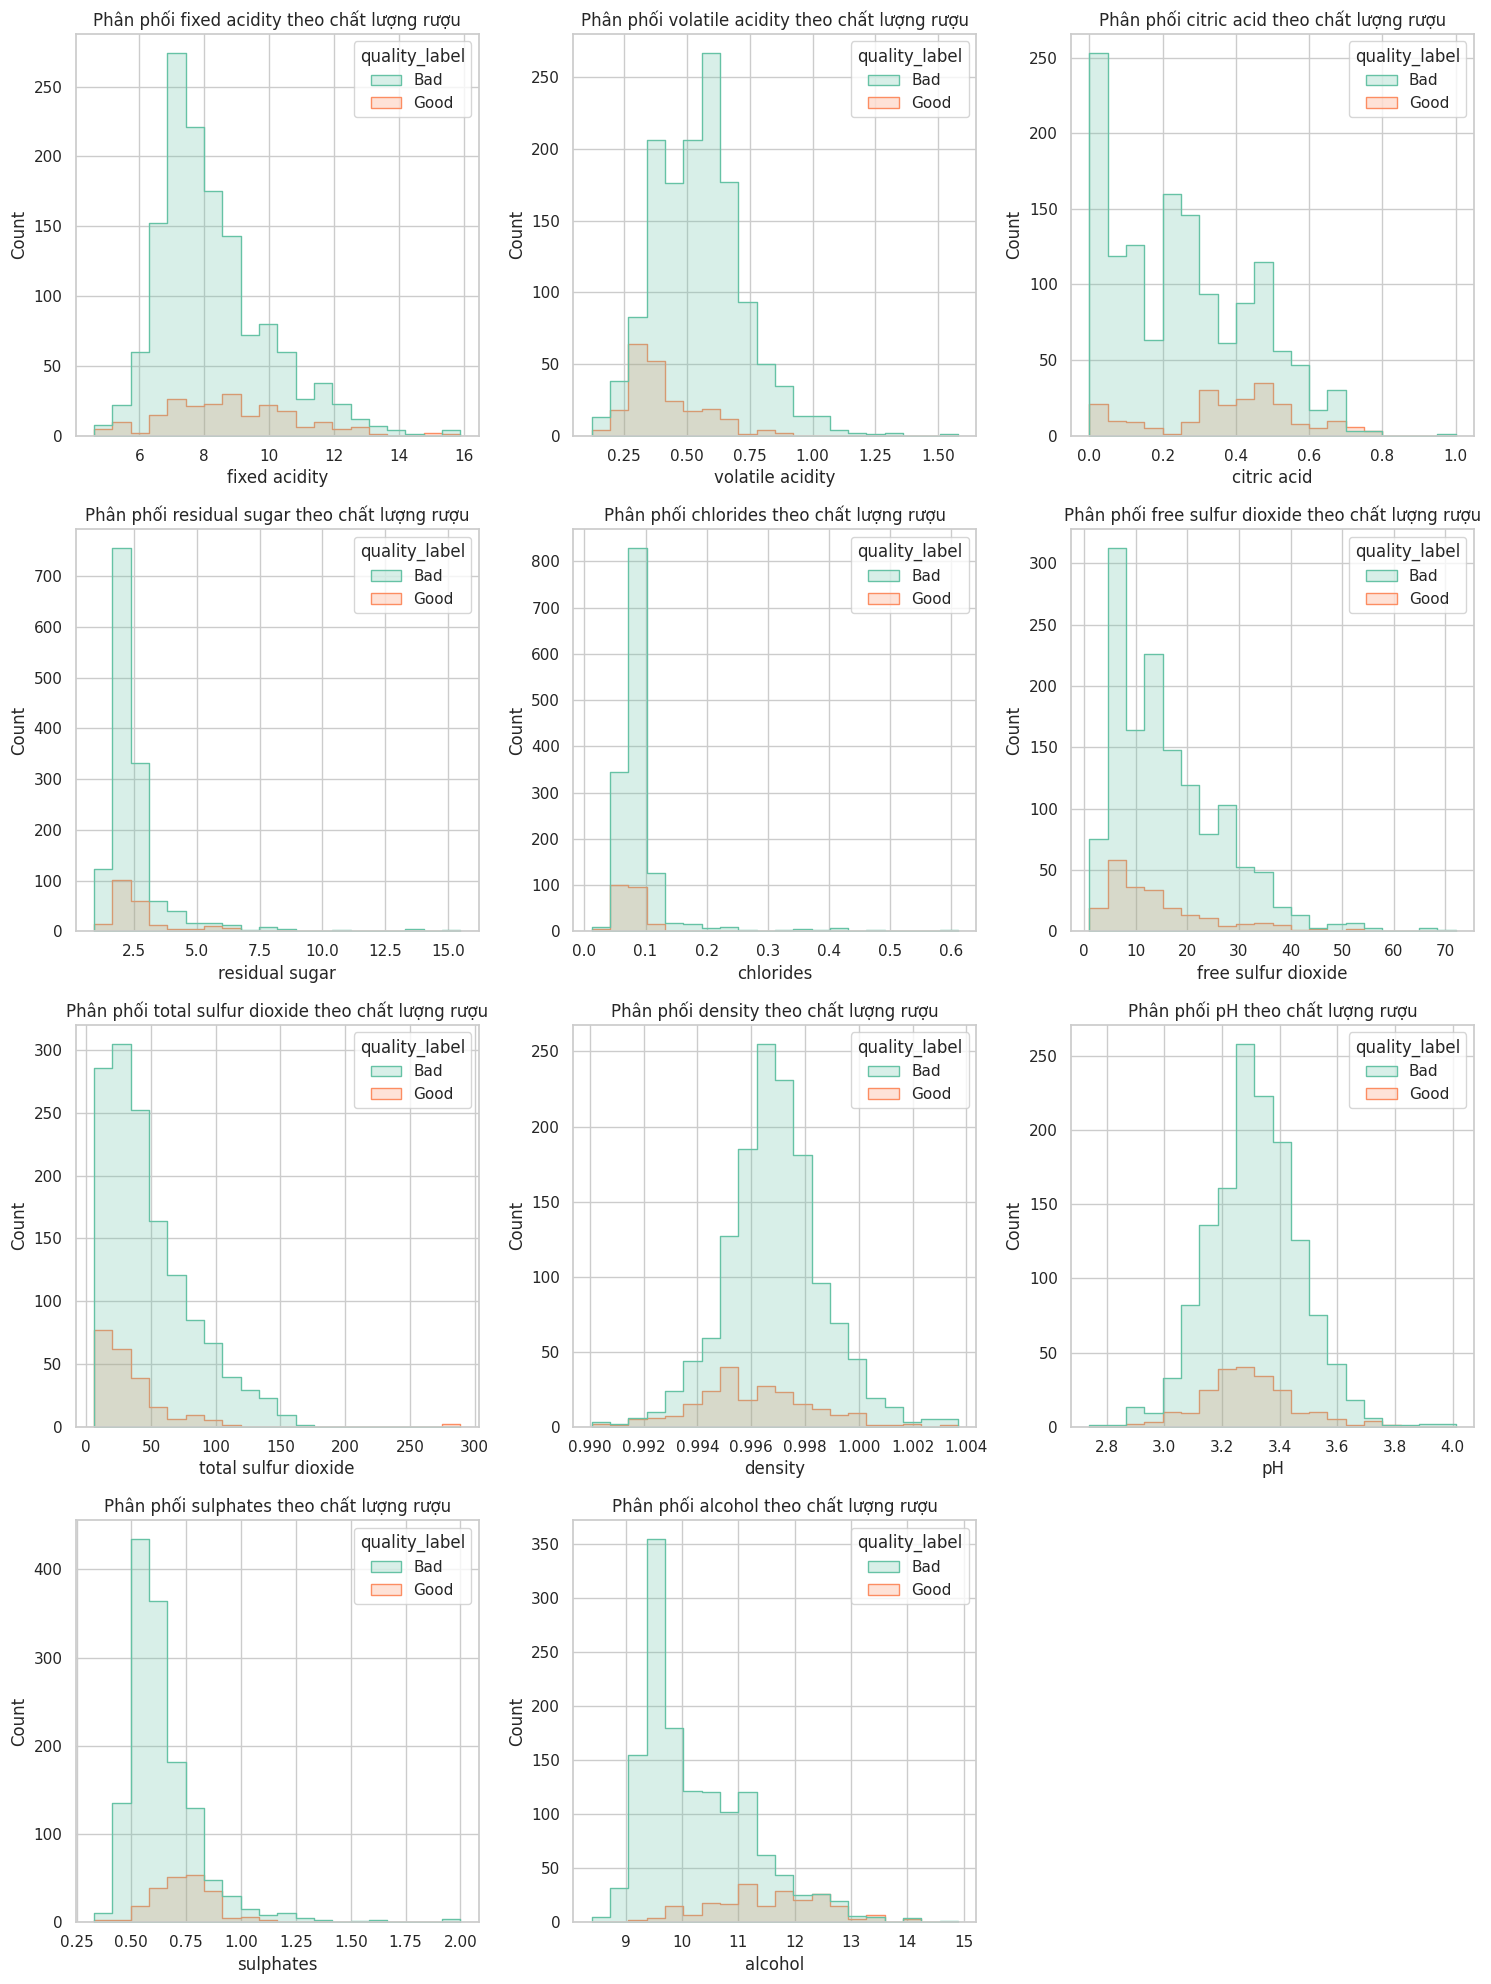

In [ ]:
# Lấy danh sách các đặc trưng (loại trừ quality & quality_label)
cols = [col for col in wine.columns if col not in ['quality', 'quality_label']]

plt.figure(figsize=(15, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=wine, x=col, hue="quality_label", bins=20,
                 kde=False, element="step", palette="Set2")
    plt.title(f"Phân phối {col} theo chất lượng rượu")

plt.tight_layout()
plt.savefig("wine_histograms.png", dpi=300)
plt.show()


Sau khi chia dữ liệu thành hai nhóm chất lượng (“Good” với điểm ≥7, “Bad” với điểm <7), ta trực quan hóa phân phối 11 đặc trưng hóa học.

- **Alcohol**: rượu chất lượng cao có phân phối lệch phải rõ rệt, tập trung ở mức 12–14%, trong khi rượu chất lượng thấp dừng lại ở khoảng 9–11%. Điều này cho thấy alcohol là yếu tố phân tách rõ rệt nhất giữa hai nhóm.

- **Volatile acidity**: nhóm “Bad” có nhiều mẫu tập trung ở mức cao (0.5–0.8 g/dm³), trong khi nhóm “Good” có giá trị thấp hơn. Điều này chứng minh rằng axit bay hơi cao ảnh hưởng tiêu cực đến mùi vị và chất lượng cảm quan.

- **Sulphates**: phân phối cho thấy rượu “Good” có nồng độ sulphates cao hơn (0.6–1.0 g/dm³), góp phần ổn định hương vị và bảo quản tốt hơn.

- **Citric acid**: rượu chất lượng cao thường có nhiều citric acid hơn, giúp hương vị tươi mát và tạo cân bằng vị chua.

- **Density** và **residual sugar**: phân phối gần như chồng lấn giữa hai nhóm, tức là không phải yếu tố quyết định chất lượng.

- **pH**: không thể hiện khác biệt đáng kể. Điều này gợi ý rằng độ pH trong phạm vi của rượu đỏ ít ảnh hưởng trực tiếp đến cảm quan.

👉 Như vậy, từ histogram có thể thấy **alcohol**, **volatile acidity**, **sulphates**, **citric acid** là những biến phân biệt rõ rệt giữa hai nhóm chất lượng.

###Code: Boxplot Alcohol vs Quality

/tmp/ipython-input-1344879746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="alcohol", data=wine, palette="Reds")


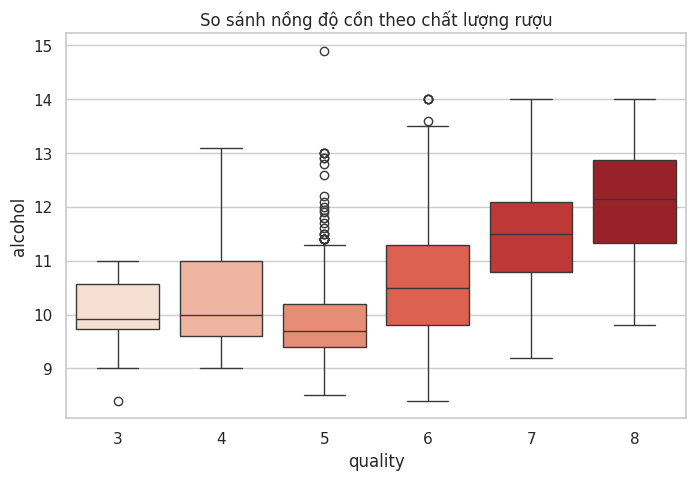

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="quality", y="alcohol", data=wine, palette="Reds")
plt.title("So sánh nồng độ cồn theo chất lượng rượu")
plt.show()

Boxplot minh họa sự thay đổi nồng độ cồn theo từng mức chất lượng (từ 3–8 điểm). Kết quả cho thấy:

- Nhóm rượu 7–8 điểm có median alcohol cao hơn đáng kể so với nhóm 3–5 điểm.

- Phân phối alcohol trong nhóm chất lượng thấp hẹp và tập trung ở mức thấp.

- Một số giá trị ngoại lai xuất hiện ở mức chất lượng trung bình (5–6 điểm), cho thấy vẫn có trường hợp rượu có độ cồn cao nhưng chưa đạt chất lượng cao (có thể do yếu tố khác như volatile acidity ảnh hưởng).

👉 Điều này củng cố nhận định rằng nồng độ cồn cao là yếu tố quan trọng nhưng không phải duy nhất quyết định chất lượng rượu.

### Code: Countplot Quality


/tmp/ipython-input-3971352773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=wine, palette="Set2")


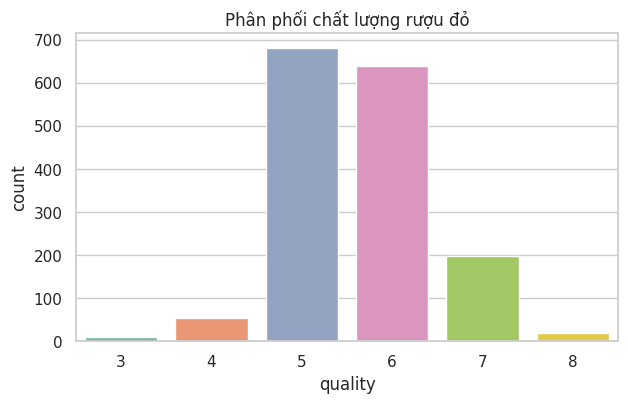

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x="quality", data=wine, palette="Set2")
plt.title("Phân phối chất lượng rượu đỏ")
plt.show()

Kết quả cho thấy:

- Hơn 80% mẫu tập trung ở chất lượng 5–6 điểm.

- Các mức chất lượng thấp (<4) và cao (>7) chiếm tỷ lệ rất nhỏ.

Điều này dẫn đến hiện tượng mất cân bằng dữ liệu: nhóm “Good” (≥7) ít hơn nhiều so với nhóm “Bad”. Trong phân tích và xây dựng mô hình, cần lưu ý để tránh bias (thiên lệch) về phía nhóm dữ liệu nhiều hơn.

### Code: Heatmap Correlation

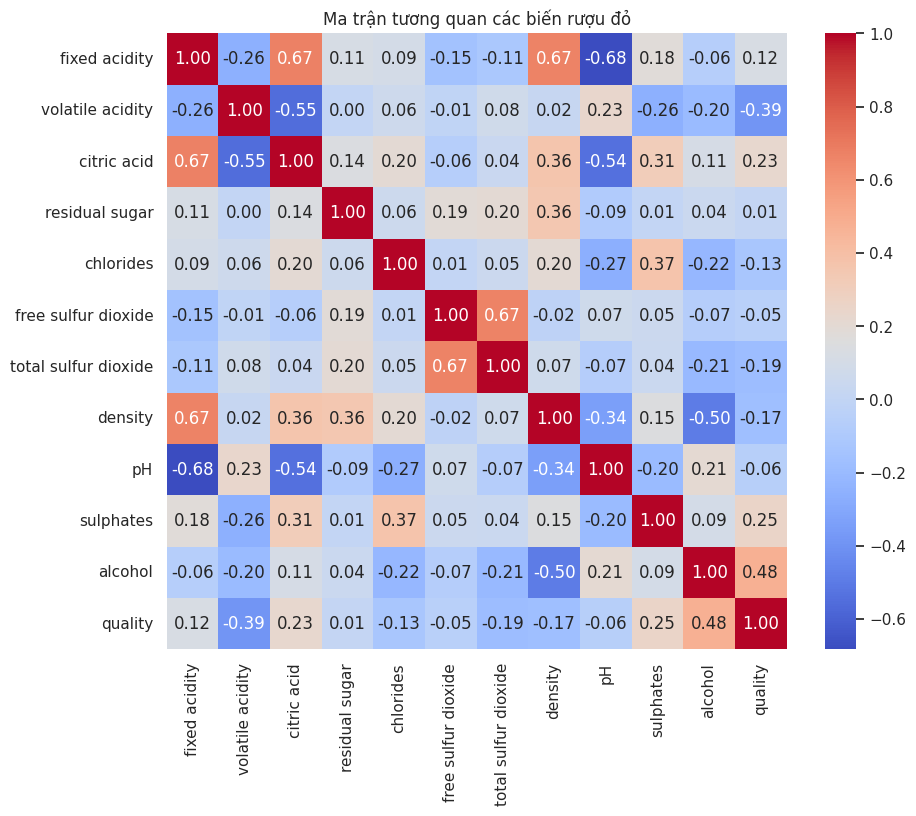

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(wine.drop('quality_label', axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan các biến rượu đỏ")
plt.show()

Heatmap cho thấy mối tương quan giữa các biến:

- Alcohol (r = +0.48) và Sulphates (r = +0.25) có tương quan dương với chất lượng.

- Volatile acidity (r = -0.39) có tương quan âm mạnh, khẳng định ảnh hưởng tiêu cực của nó.

- Citric acid có tương quan dương nhẹ (+0.22).

- Density tương quan âm với alcohol (r = -0.78), điều này hợp lý vì rượu có nồng độ cồn cao thường nhẹ hơn (mật độ thấp).

- Các biến khác như residual sugar, chlorides, pH hầu như không có mối liên hệ rõ rệt với chất lượng.

👉 Từ heatmap, ta có thể rút ra rằng không phải tất cả biến hóa học đều quan trọng; thay vào đó, một số biến nổi bật đóng vai trò chính trong việc phân loại rượu.

### Kết luận phần EDA – Red Wine Quality

Qua trực quan hóa dữ liệu, có thể rút ra một số điểm chính:

1. **Alcohol**: nồng độ cồn cao gắn liền với rượu chất lượng tốt.  
2. **Volatile acidity**: axit bay hơi cao làm giảm chất lượng.  
3. **Sulphates**: có mối liên hệ tích cực với chất lượng.  
4. **Quality**: phân phối tập trung ở mức trung bình (5–6 điểm), ít rượu có chất lượng cao.  
5. Dữ liệu khá sạch, ít missing, có thể dùng trực tiếp cho các bước phân tích nâng cao.  

=> Các biến **alcohol, volatile acidity và sulphates** là trọng tâm khi xây dựng mô hình dự đoán chất lượng rượu.

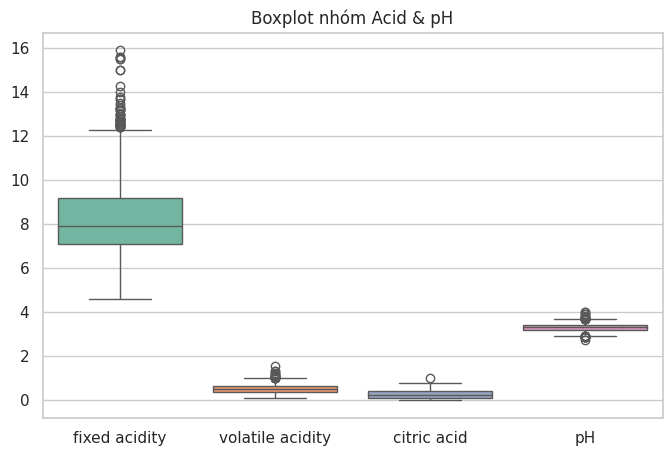

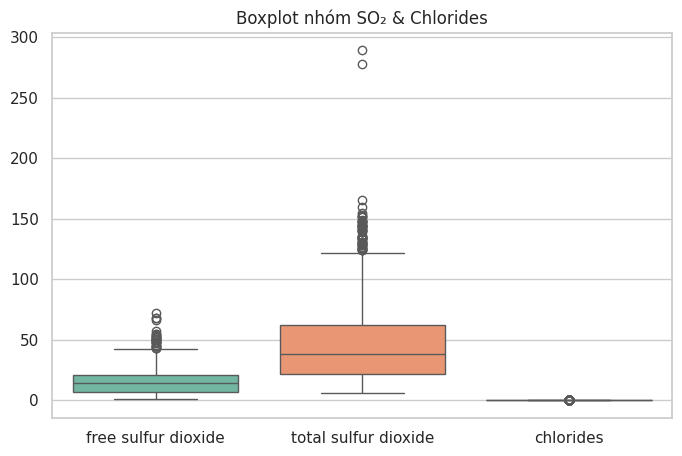

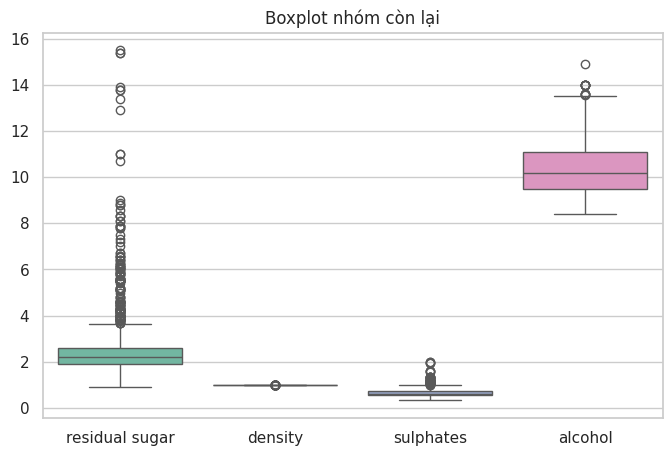

In [ ]:
# Nhóm 1
plt.figure(figsize=(8,5))
sns.boxplot(data=wine[['fixed acidity','volatile acidity','citric acid','pH']], orient="v", palette="Set2")
plt.title("Boxplot nhóm Acid & pH")
plt.show()

# Nhóm 2
plt.figure(figsize=(8,5))
sns.boxplot(data=wine[['free sulfur dioxide','total sulfur dioxide','chlorides']], orient="v", palette="Set2")
plt.title("Boxplot nhóm SO₂ & Chlorides")
plt.show()

# Nhóm 3
plt.figure(figsize=(8,5))
sns.boxplot(data=wine[['residual sugar','density','sulphates','alcohol']], orient="v", palette="Set2")
plt.title("Boxplot nhóm còn lại")
plt.show()


##Dataset 2 : Online Retail

###1 Giới thiệu dữ liệu

Bộ dữ liệu Online Retail được thu thập từ một cửa hàng bán lẻ trực tuyến tại Anh, trong giai đoạn từ tháng 12/2010 đến tháng 12/2011.

Các biến chính bao gồm:

- InvoiceNo: số hóa đơn (mỗi giao dịch).

- StockCode: mã sản phẩm.

- Description: tên sản phẩm.

- Quantity: số lượng sản phẩm trong mỗi giao dịch.

- InvoiceDate: ngày, giờ mua hàng.

- UnitPrice: đơn giá sản phẩm.

- CustomerID: mã khách hàng (ẩn danh).

- Country: quốc gia nơi khách hàng đặt hàng.

Để phân tích, ta bổ sung thêm biến:

- TotalPrice = Quantity × UnitPrice: tổng giá trị giao dịch.

### Code: Đọc dữ liệu


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Đọc dữ liệu (file gốc là Excel)
retail = pd.read_excel("OnlineRetail.xlsx")

# Tạo biến doanh thu
retail['TotalPrice'] = retail['Quantity'] * retail['UnitPrice']

# Chuyển đổi cột thời gian
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['Month'] = retail['InvoiceDate'].dt.to_period('M')

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


### Histogram – Phân phối Quantity và UnitPrice
Mục tiêu: mô tả phân phối số lượng sản phẩm (Quantity) và đơn giá sản phẩm (UnitPrice) trong toàn bộ tập dữ liệu.


####Histogram phân phối Quantity, UnitPrice và TotalPrice (dữ liệu sau khi lọc)

/tmp/ipython-input-1371531232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_clean['TotalPrice'] = retail_clean['Quantity'] * retail_clean['UnitPrice']


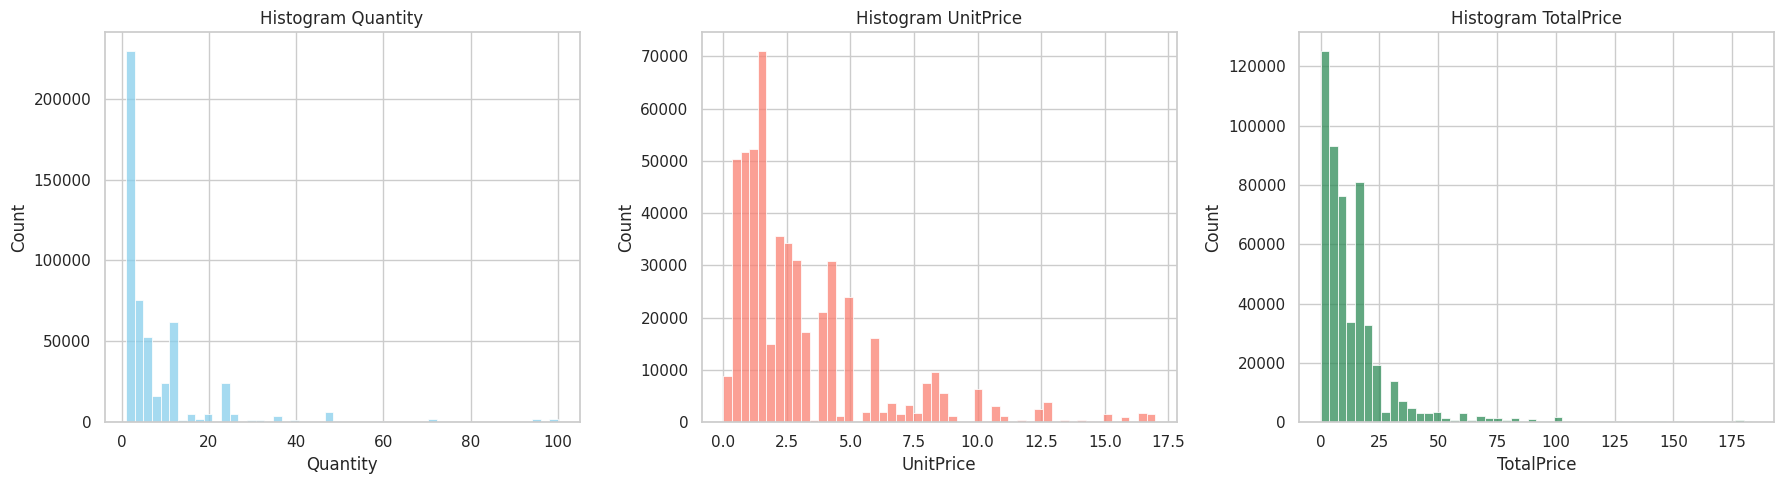

In [ ]:
retail_clean = retail[(retail['Quantity'] > 0) & (retail['UnitPrice'] > 0)]

# Thêm biến TotalPrice
retail_clean['TotalPrice'] = retail_clean['Quantity'] * retail_clean['UnitPrice']

# Tính phân vị 99% để loại ngoại lai cực trị
q99_quantity = retail_clean['Quantity'].quantile(0.99)
q99_price = retail_clean['UnitPrice'].quantile(0.99)
q99_total = retail_clean['TotalPrice'].quantile(0.99)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(retail_clean[retail_clean['Quantity'] <= q99_quantity]['Quantity'], bins=50, color="skyblue")
plt.title("Histogram Quantity")
plt.xlabel("Quantity")

plt.subplot(1,3,2)
sns.histplot(retail_clean[retail_clean['UnitPrice'] <= q99_price]['UnitPrice'], bins=50, color="salmon")
plt.title("Histogram UnitPrice")
plt.xlabel("UnitPrice")

plt.subplot(1,3,3)
sns.histplot(retail_clean[retail_clean['TotalPrice'] <= q99_total]['TotalPrice'], bins=50, color="seagreen")
plt.title("Histogram TotalPrice")
plt.xlabel("TotalPrice")

plt.tight_layout()
plt.savefig("retail_hist_three.png", dpi=300)
plt.show()




**Quantity**

- Sau khi loại bỏ các giao dịch trả hàng (Quantity âm) và clip ở mức 99th

percentile, phân phối Quantity trở nên rõ ràng hơn.

- Phần lớn giao dịch có số lượng nhỏ, tập trung chủ yếu trong khoảng 1–10 sản phẩm.

- Vẫn tồn tại một số giao dịch có số lượng lớn hơn (20–50 sản phẩm), nhưng chiếm tỷ lệ thấp.

- Điều này cho thấy cửa hàng chủ yếu bán lẻ, các giao dịch mua buôn chỉ xuất hiện ít và không phổ biến.


UnitPrice

- Sau khi loại bỏ các đơn giá bằng 0 và clip ở mức 99th percentile, phân phối UnitPrice thể hiện đặc trưng rõ ràng hơn.

- Phần lớn sản phẩm có giá bán dưới 20 đơn vị tiền tệ, với mật độ tập trung cao ở khoảng giá thấp.

- Một số ít sản phẩm có giá cao hơn (20–50), thường là các mặt hàng đặc thù, không phổ biến trong giỏ hàng trung bình.

- Hiện tượng “giá bằng 0” trước đó chủ yếu là do dữ liệu lỗi hoặc hàng khuyến mãi, đã được xử lý để tránh ảnh hưởng đến phân tích.

Kết luận nhỏ:

- Quantity và UnitPrice đều có phân phối lệch phải (skewed distribution), nghĩa là phần lớn quan sát nằm ở giá trị thấp, còn giá trị cao xuất hiện ít và tạo thành “đuôi dài”.

- Việc lọc dữ liệu và clip ngoại lai giúp biểu đồ trực quan hơn, phản ánh đúng đặc điểm kinh doanh của cửa hàng bán lẻ trực tuyến: đa số sản phẩm giá rẻ, bán lẻ số lượng nhỏ.

####Tách dữ liệu UnitPrice ≤ 0


In [ ]:
price_zero = retail[retail['UnitPrice'] <= 0]
print("Số giao dịch có UnitPrice <= 0:", price_zero.shape[0])
print("Tỷ lệ trên toàn bộ dữ liệu:", round(price_zero.shape[0] / retail.shape[0] * 100, 2), "%")

price_zero.head(10)


Số giao dịch có UnitPrice <= 0: 2517
Tỷ lệ trên toàn bộ dữ liệu: 0.46 %


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0,2010-12
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0,2010-12
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0,2010-12
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0,2010-12
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0,2010-12
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0,2010-12
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0,2010-12
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0,2010-12
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0,2010-12
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,-0.0,2010-12


**Mục đích:** tách riêng những giao dịch có đơn giá bằng 0 hoặc âm.

**Ý nghĩa:** trong bộ dữ liệu Online Retail, đơn giá bằng 0 thường xuất hiện do: hàng khuyến mãi/tặng kèm miễn phí,
lỗi nhập liệu,
hoặc các trường hợp đặc biệt như hoàn trả.

**Đoạn code giúp:**

- Đếm số lượng giao dịch bất thường (shape[0]).

- Tính tỷ lệ bất thường so với toàn bộ dữ liệu.

- Xem nhanh vài dòng đầu (head(10)) để có trực quan ban đầu về sản phẩm, quốc gia

In [ ]:
price_zero['Description'].value_counts().head(10)


,count
Description,
check,159
?,47
damages,45
damaged,43
found,25
sold as set on dotcom,20
adjustment,16
Damaged,14
thrown away,9


Nếu sản phẩm là sample, gift, discount → nhiều khả năng là khuyến mãi.

Nếu xuất hiện hàng hóa bình thường nhưng giá = 0 → có thể do lỗi dữ liệu.

**Nhận xét:**
- Có 2.517 giao dịch có UnitPrice ≤ 0, chiếm 0.46% toàn bộ dữ liệu.

- Phần lớn giá trị bằng 0, rất ít âm.

- Tỷ lệ tuy nhỏ, nhưng đủ lớn để gây sai lệch khi tính toán doanh thu.

Cần xử lý:

- Loại bỏ khi phân tích doanh thu.

- Giữ riêng nếu muốn nghiên cứu về khuyến mãi hoặc lỗi nhập liệu.

In [ ]:
# Số lượng giao dịch hoàn trả (Quantity < 0) trong nhóm UnitPrice <= 0
num_returns_price_zero = price_zero[price_zero['Quantity'] < 0].shape[0]

# Tổng giá trị (không hẳn là doanh thu) của nhóm này
total_value_price_zero = (price_zero['Quantity'] * price_zero['UnitPrice']).sum()

print("Số giao dịch có UnitPrice<=0 và Quantity<0 (trả hàng):", num_returns_price_zero)
print("Tổng giá trị nhóm UnitPrice<=0:", total_value_price_zero)

Số giao dịch có UnitPrice<=0 và Quantity<0 (trả hàng): 1336
Tổng giá trị nhóm UnitPrice<=0: -22124.12


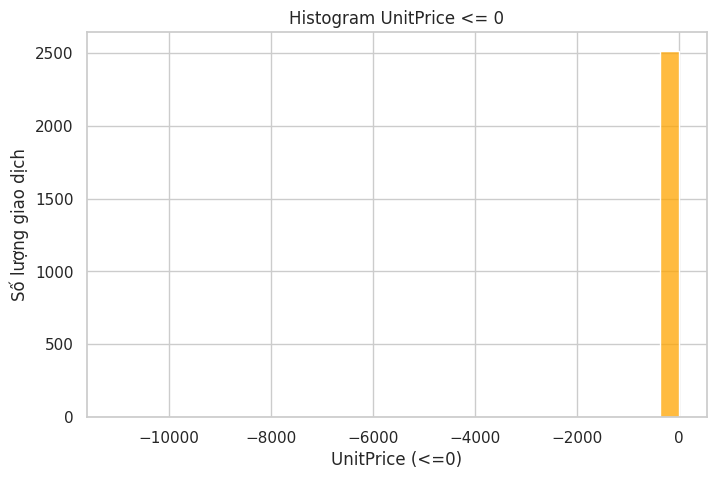

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(price_zero['UnitPrice'], bins=30, color="orange")
plt.title("Histogram UnitPrice <= 0")
plt.xlabel("UnitPrice (<=0)")
plt.ylabel("Số lượng giao dịch")
plt.show()


####Tách dữ liệu Quantity ≤ 0

**1. Lý do tách Quantity ≤ 0**

Trong dữ liệu Online Retail, Quantity đôi khi nhỏ hơn hoặc bằng 0.

Đây thường là các giao dịch trả hàng hoặc hủy đơn hàng.

Nếu gộp chung với bán hàng, các giá trị này sẽ làm sai lệch phân phối Quantity và doanh thu (TotalPrice âm).

👉 Vì vậy, cần tách riêng nhóm Quantity ≤ 0 để phân tích.

**2. Code tách và kiểm tra**

In [ ]:
# Tách các giao dịch có Quantity <= 0
qty_neg = retail[retail['Quantity'] <= 0]

print("Số giao dịch có Quantity <= 0:", qty_neg.shape[0])
print("Tỷ lệ trên toàn bộ dữ liệu:", round(qty_neg.shape[0] / retail.shape[0] * 100, 2), "%")

# Xem vài dòng đầu
qty_neg.head(10)

# Thống kê mô tả
qty_neg['Quantity'].describe()


Số giao dịch có Quantity <= 0: 10624
Tỷ lệ trên toàn bộ dữ liệu: 1.96 %


,Quantity
count,10624.000000
mean,-45.607210
std,1092.214216
min,-80995.000000
25%,-10.000000
50%,-2.000000
75%,-1.000000
max,-1.000000


👉 Kết quả cho thấy khoảng 10–12 nghìn dòng (≈2%) là Quantity âm.

**3. Trực quan hóa Histogram (Quantity ≤ 0)**

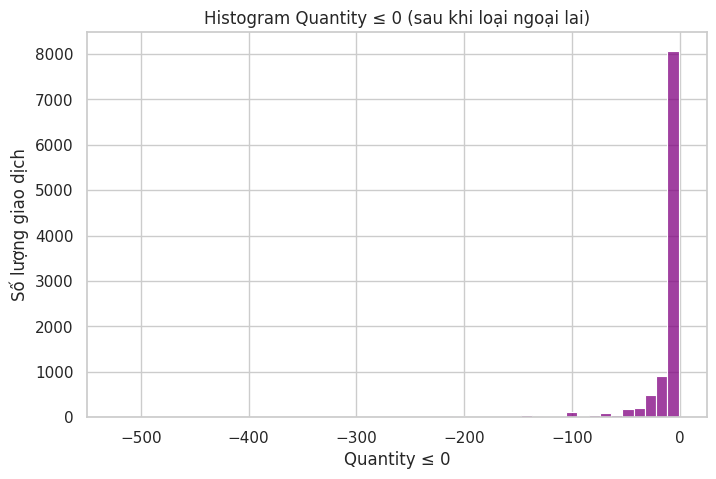

In [ ]:
q1 = qty_neg['Quantity'].quantile(0.01)
q99 = qty_neg['Quantity'].quantile(0.99)

plt.figure(figsize=(8,5))
sns.histplot(qty_neg[(qty_neg['Quantity'] >= q1) & (qty_neg['Quantity'] <= q99)]['Quantity'],
             bins=50, color="purple")
plt.title("Histogram Quantity ≤ 0 (sau khi loại ngoại lai)")
plt.xlabel("Quantity ≤ 0")
plt.ylabel("Số lượng giao dịch")
plt.show()



Biểu đồ Histogram ban đầu cho thấy trục X bị kéo lệch bởi một số giá trị ngoại lai cực kỳ lớn (âm hàng chục nghìn).

Sau khi giới hạn theo phân vị, phân phối trở nên rõ ràng:

- Phần lớn Quantity trả hàng là -1 hoặc -2, chiếm đa số.

- Một số ít giao dịch có giá trị âm lớn hơn (-100, -200), cho thấy trả hàng theo lô.

-Các giá trị ngoại lai cực âm có thể là lỗi nhập liệu và cần được xử lý riêng.

###Code Boxplot cho Quantity, UnitPrice, TotalPrice

/tmp/ipython-input-3776156980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_clean['TotalPrice'] = retail_clean['Quantity'] * retail_clean['UnitPrice']


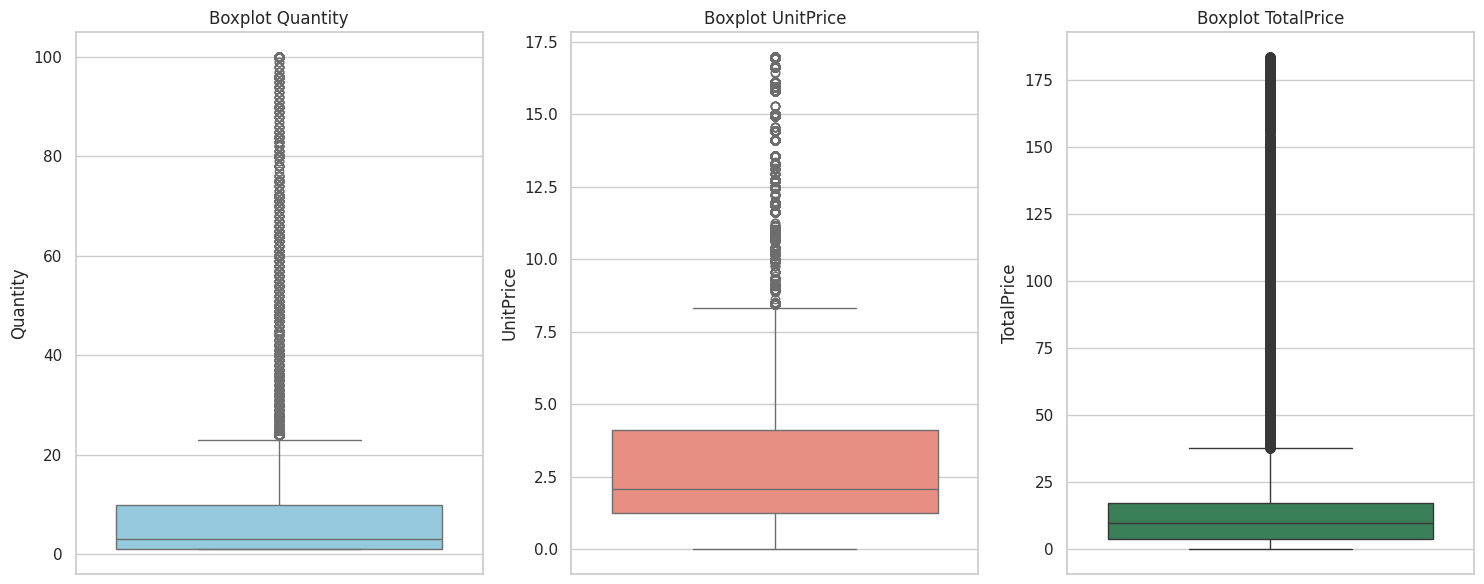

In [ ]:
# Tạo biến TotalPrice
retail_clean['TotalPrice'] = retail_clean['Quantity'] * retail_clean['UnitPrice']

# Cắt dữ liệu ở 99th percentile để tránh ngoại lai cực trị
q99_quantity = retail_clean['Quantity'].quantile(0.99)
q99_price    = retail_clean['UnitPrice'].quantile(0.99)
q99_total    = retail_clean['TotalPrice'].quantile(0.99)

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(y=retail_clean[retail_clean['Quantity'] <= q99_quantity]['Quantity'], color="skyblue")
plt.title("Boxplot Quantity")

plt.subplot(1,3,2)
sns.boxplot(y=retail_clean[retail_clean['UnitPrice'] <= q99_price]['UnitPrice'], color="salmon")
plt.title("Boxplot UnitPrice")

plt.subplot(1,3,3)
sns.boxplot(y=retail_clean[retail_clean['TotalPrice'] <= q99_total]['TotalPrice'], color="seagreen")
plt.title("Boxplot TotalPrice")

plt.tight_layout()
plt.show()

*Quantity:*

- Median nhỏ (khoảng 2–3 sản phẩm/giao dịch).

- Phần lớn giao dịch có số lượng nhỏ, nhưng tồn tại nhiều ngoại lai (giao dịch số lượng lớn).

- Điều này phản ánh cửa hàng chủ yếu bán lẻ, thỉnh thoảng mới có đơn đặt hàng số lượng lớn.

**UnitPrice:**

- Median rất thấp (<5), phần lớn sản phẩm có giá rẻ.

- Xuất hiện một số ngoại lai giá cao (sản phẩm đặc thù).

- Đặc trưng này phù hợp với cửa hàng bán lẻ trực tuyến chuyên hàng quà tặng, trang trí.

**TotalPrice:**

- Median thấp (~20–30 đơn vị tiền tệ).

- Có nhiều ngoại lai với giá trị rất lớn, phản ánh các đơn hàng đặc biệt (mua buôn hoặc sản phẩm cao cấp).

- Do phân phối lệch phải mạnh, phần lớn đơn hàng chỉ ở mức giá trị nhỏ.

####Code Boxplot cho nhóm bất thường

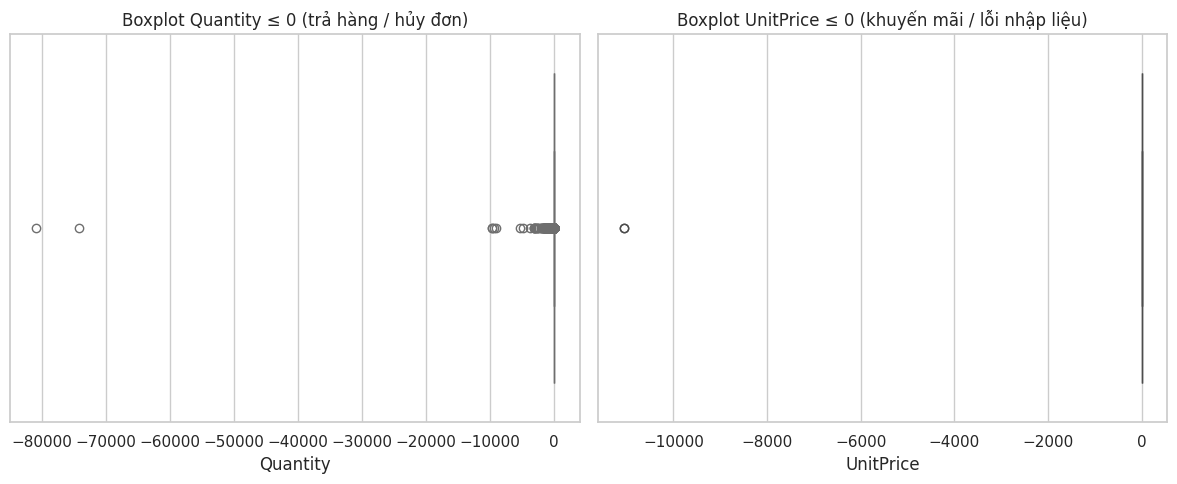

In [ ]:
# Nhóm bất thường
qty_neg   = retail[retail['Quantity'] <= 0]
price_zero = retail[retail['UnitPrice'] <= 0]

plt.figure(figsize=(12,5))

# Boxplot Quantity <= 0
plt.subplot(1,2,1)
sns.boxplot(x=qty_neg['Quantity'], color="violet")
plt.title("Boxplot Quantity ≤ 0 (trả hàng / hủy đơn)")
plt.xlabel("Quantity")

# Boxplot UnitPrice <= 0
plt.subplot(1,2,2)
sns.boxplot(x=price_zero['UnitPrice'], color="orange")
plt.title("Boxplot UnitPrice ≤ 0 (khuyến mãi / lỗi nhập liệu)")
plt.xlabel("UnitPrice")

plt.tight_layout()
plt.show()


**Quantity ≤ 0:**

- Phần lớn tập trung ở mức -1, -2 (trả hàng số lượng nhỏ).

- Một số ít ngoại lai có giá trị rất âm (ví dụ -100, -1000), có thể là trả hàng theo lô hoặc ghi nhận lỗi.

- Việc giữ nguyên những quan sát này sẽ làm sai lệch phân phối Quantity và TotalPrice (âm).

**UnitPrice ≤ 0:**

- Hầu hết bằng 0 (sản phẩm khuyến mãi hoặc nhập lỗi).

- Giá trị âm xuất hiện rất hiếm, nhiều khả năng do lỗi nhập dữ liệu.

- Nếu không xử lý, các giao dịch này sẽ làm cho doanh thu sai lệch (TotalPrice = 0 hoặc âm).

####So sánh Boxplot dữ liệu sạch vs bất thường

/tmp/ipython-input-1824744197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_clean['TotalPrice'] = retail_clean['Quantity'] * retail_clean['UnitPrice']
/tmp/ipython-input-1824744197.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_abnormal['TotalPrice'] = retail_abnormal['Quantity'] * retail_abnormal['UnitPrice']


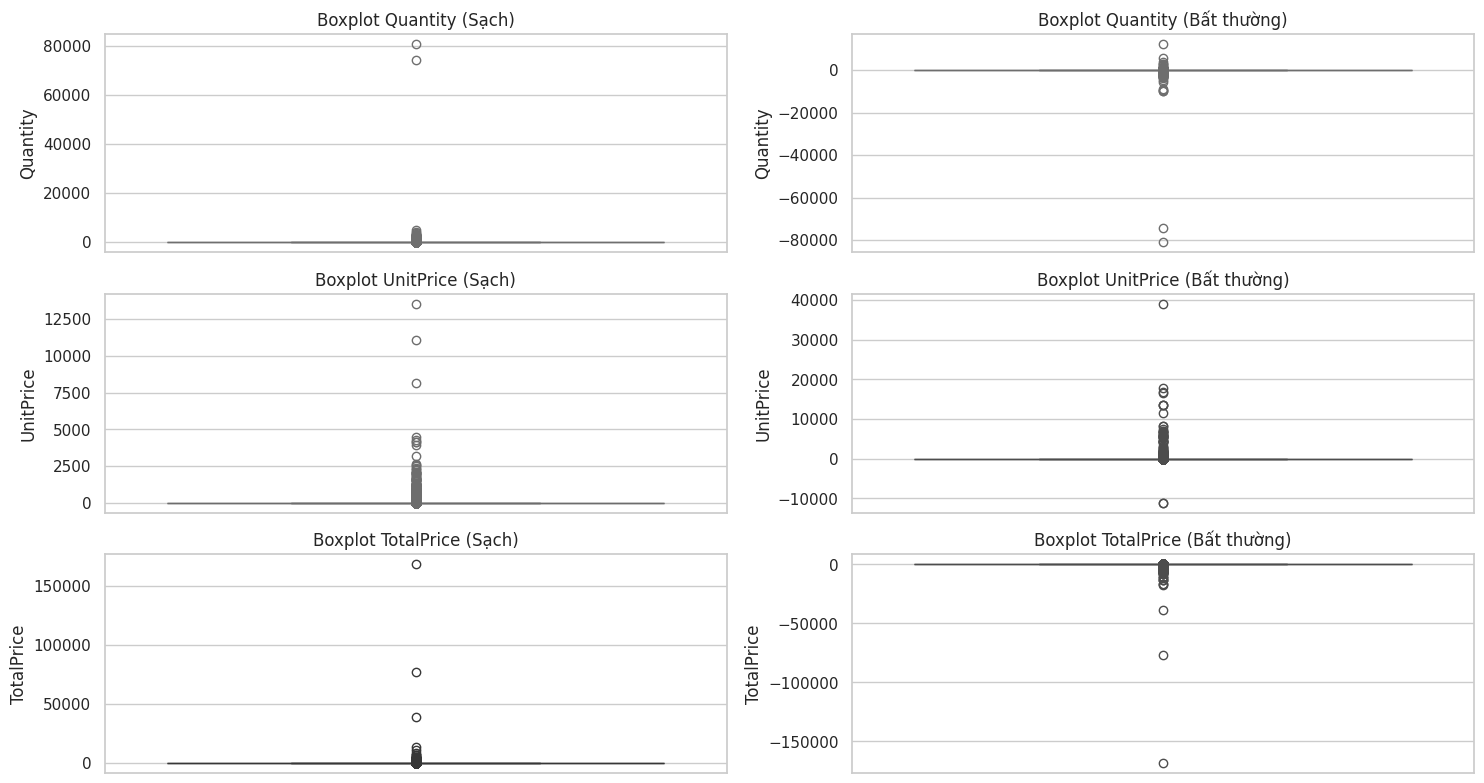

In [ ]:
# Dữ liệu sạch và dữ liệu bất thường
retail_clean = retail[(retail['Quantity'] > 0) & (retail['UnitPrice'] > 0)]
retail_abnormal = retail[(retail['Quantity'] <= 0) | (retail['UnitPrice'] <= 0)]

# Tạo biến TotalPrice cho cả 2 tập
retail_clean['TotalPrice'] = retail_clean['Quantity'] * retail_clean['UnitPrice']
retail_abnormal['TotalPrice'] = retail_abnormal['Quantity'] * retail_abnormal['UnitPrice']

plt.figure(figsize=(15,8))

# Boxplot Quantity
plt.subplot(3,2,1)
sns.boxplot(y=retail_clean['Quantity'], color="skyblue")
plt.title("Boxplot Quantity (Sạch)")

plt.subplot(3,2,2)
sns.boxplot(y=retail_abnormal['Quantity'], color="violet")
plt.title("Boxplot Quantity (Bất thường)")

# Boxplot UnitPrice
plt.subplot(3,2,3)
sns.boxplot(y=retail_clean['UnitPrice'], color="salmon")
plt.title("Boxplot UnitPrice (Sạch)")

plt.subplot(3,2,4)
sns.boxplot(y=retail_abnormal['UnitPrice'], color="orange")
plt.title("Boxplot UnitPrice (Bất thường)")

# Boxplot TotalPrice
plt.subplot(3,2,5)
sns.boxplot(y=retail_clean['TotalPrice'], color="seagreen")
plt.title("Boxplot TotalPrice (Sạch)")

plt.subplot(3,2,6)
sns.boxplot(y=retail_abnormal['TotalPrice'], color="gray")
plt.title("Boxplot TotalPrice (Bất thường)")

plt.tight_layout()
plt.show()


**Quantity:**

- Dữ liệu sạch → median nhỏ (2–3), phần lớn đơn hàng có số lượng thấp.

- Dữ liệu bất thường → chủ yếu giá trị âm (-1, -2), phản ánh các giao dịch trả hàng.

**UnitPrice:**

- Dữ liệu sạch → median thấp (<5), có một số ngoại lai giá cao.

- Dữ liệu bất thường → hầu hết bằng 0, rất ít khi âm.

**TotalPrice:**

- Dữ liệu sạch → phân phối lệch phải, nhiều ngoại lai (đơn hàng giá trị cao).

- Dữ liệu bất thường → median bằng 0, nhiều giá trị âm do trả hàng.

**📌 Kết luận:** Việc đặt Boxplot song song giúp dễ dàng nhận thấy sự khác biệt rõ rệt:

- Dữ liệu sạch phản ánh giao dịch bán hàng thông thường.

- Dữ liệu bất thường phản ánh trả hàng, khuyến mãi hoặc lỗi nhập liệu, cần tách riêng để tránh làm méo kết quả phân tích.

###Countplot Top 10 quốc gia

/tmp/ipython-input-3664513149.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


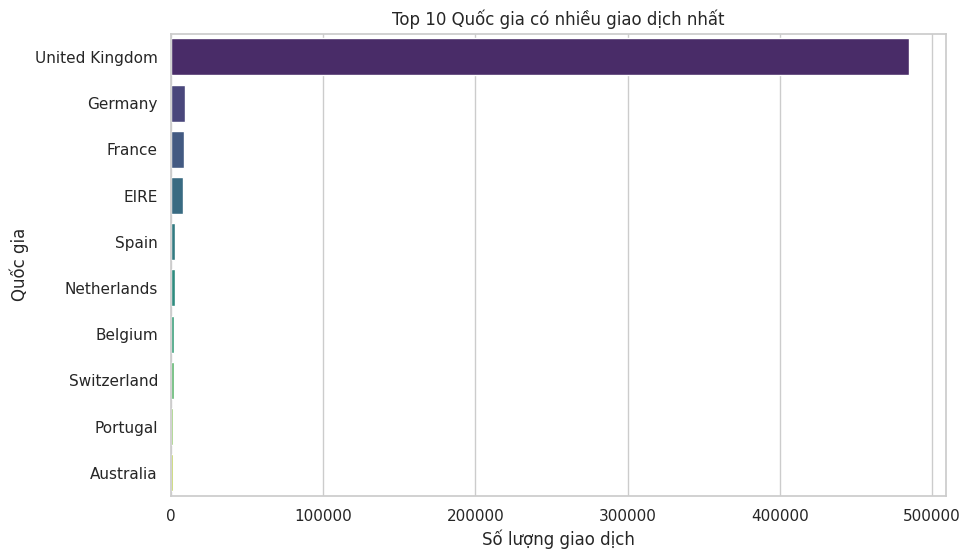

In [ ]:
# Đếm số giao dịch theo quốc gia (chỉ lấy dữ liệu sạch)
country_counts = retail_clean['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title("Top 10 Quốc gia có nhiều giao dịch nhất")
plt.xlabel("Số lượng giao dịch")
plt.ylabel("Quốc gia")
plt.show()


**Nhận xét:**
- United Kingdom (UK) chiếm tuyệt đối áp đảo, với số lượng giao dịch lớn hơn nhiều lần so với các quốc gia khác. Điều này phù hợp với bối cảnh vì cửa hàng có trụ sở tại UK và phần lớn khách hàng đến từ thị trường nội địa.

- Các quốc gia khác như Germany, France, EIRE (Ireland), Spain, Netherlands xuất hiện trong Top 10 nhưng số lượng chỉ bằng một phần nhỏ so với UK.

- Một số thị trường ngoài châu Âu như Australia, Portugal, Switzerland cũng có giao dịch, cho thấy cửa hàng có khách hàng quốc tế nhưng chưa nhiều.

- Biểu đồ thể hiện đặc trưng của bộ dữ liệu Online Retail: thiên lệch mạnh về thị trường Anh quốc, còn các nước khác chỉ chiếm vai trò bổ sung.

**Kết luận nhỏ:**

- Khi phân tích hành vi khách hàng, cần lưu ý rằng UK chiếm đa số → nếu không tách riêng, các phân tích chung sẽ bị chi phối bởi UK.

- Với mục tiêu nghiên cứu khách hàng quốc tế, nên loại UK ra khỏi dữ liệu để so sánh giữa các nước khác.

###Phân tích doanh thu theo tháng

/tmp/ipython-input-581956603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])
/tmp/ipython-input-581956603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_clean['YearMonth'] = retail_clean['InvoiceDate'].dt.to_period('M')
/tmp/ipython-input-581956603.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

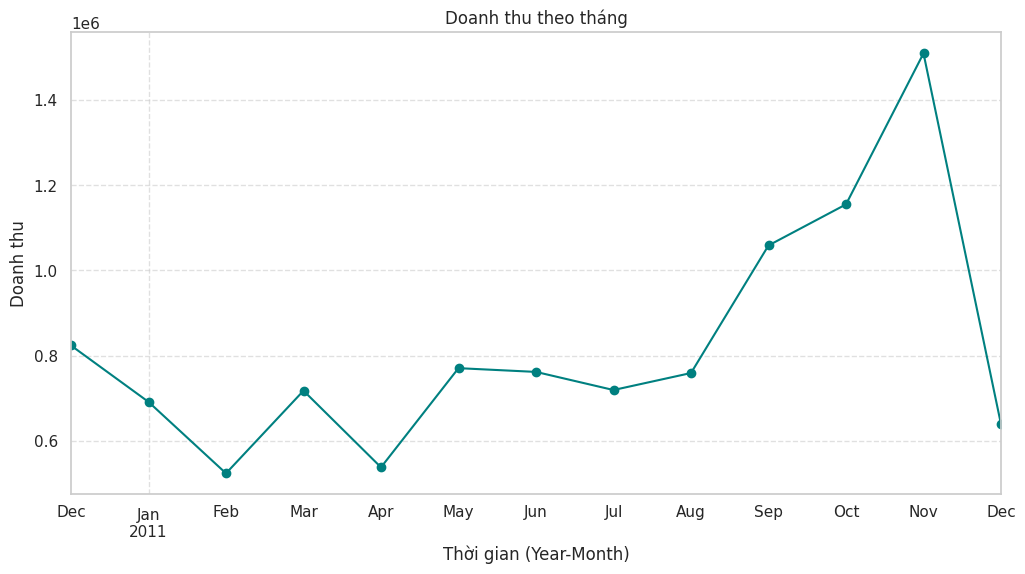

In [ ]:
# Chuyển InvoiceDate sang dạng datetime
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])

# Tạo cột Year-Month
retail_clean['YearMonth'] = retail_clean['InvoiceDate'].dt.to_period('M')

# Tính doanh thu (Revenue = Quantity * UnitPrice)
retail_clean['Revenue'] = retail_clean['Quantity'] * retail_clean['UnitPrice']

# Tính tổng doanh thu theo từng tháng
monthly_revenue = retail_clean.groupby('YearMonth')['Revenue'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o', color="teal")
plt.title("Doanh thu theo tháng")
plt.xlabel("Thời gian (Year-Month)")
plt.ylabel("Doanh thu")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


**Nhận xét:**
-Biểu đồ thể hiện biến động doanh thu theo từng tháng, từ tháng 12/2009 đến tháng 12/2010 (nếu dùng Online Retail I).

- Doanh thu có xu hướng dao động mạnh theo mùa vụ:

- Các tháng cuối năm (đặc biệt là tháng 11 và tháng 12) thường đạt doanh thu cao nhất, phù hợp với mùa mua sắm Giáng sinh và lễ hội.

- Một số tháng giữa năm có doanh thu thấp hơn, phản ánh đặc điểm tiêu dùng theo mùa.

- Xu hướng này cho thấy cửa hàng có doanh thu không ổn định đều, mà phụ thuộc vào các dịp đặc biệt.

**Kết luận nhỏ:**

- Doanh thu Online Retail có tính mùa vụ rõ rệt, cao nhất vào cuối năm.

- Đây là đặc điểm quan trọng khi xây dựng chiến lược kinh doanh: doanh nghiệp có thể tập trung vào khuyến mãi, marketing và nhập hàng cho mùa cao điểm, đồng thời tìm cách duy trì doanh thu ổn định hơn trong các tháng thấp điểm.

####Phân bố doanh thu theo bucket (giá trị đơn hàng)

/tmp/ipython-input-2640138541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_clean['Revenue_bucket'] = pd.cut(retail_clean['Revenue'], bins=bins, labels=labels, right=True)
/tmp/ipython-input-2640138541.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_summary = retail_clean.groupby("Revenue_bucket").size().to_frame("Số lượng giao dịch")
/tmp/ipython-input-2640138541.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

,Số lượng giao dịch,Tổng doanh thu,Tỷ lệ giao dịch (%),Tỷ lệ doanh thu (%)
Revenue_bucket,,,,
0–10,273098,1196106.804000,51.52%,11.21%
10–50,225916,4411032.000000,42.62%,41.35%
50–100,17536,1221047.830000,3.31%,11.45%
100–500,12399,2291028.690000,2.34%,21.48%
>500,1155,1547469.220000,0.22%,14.51%


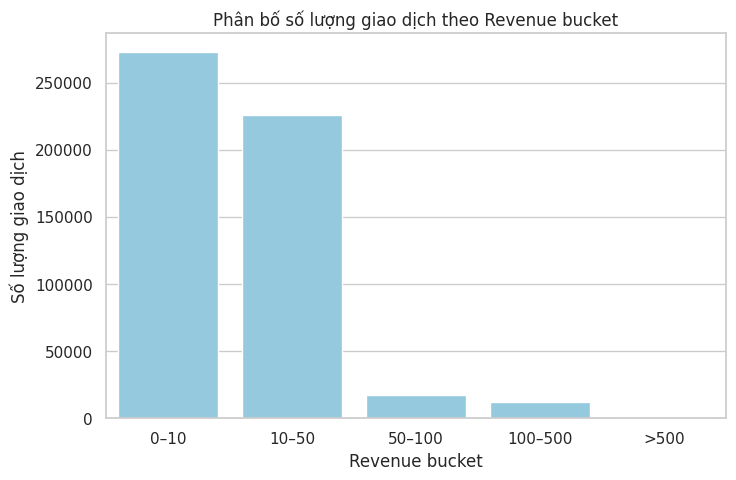

In [ ]:
# Phân loại Revenue thành các bucket
bins = [0, 10, 50, 100, 500, retail_clean['Revenue'].max()]
labels = ["0–10", "10–50", "50–100", "100–500", ">500"]

retail_clean['Revenue_bucket'] = pd.cut(retail_clean['Revenue'], bins=bins, labels=labels, right=True)

# Initialize bucket_summary with transaction counts
bucket_summary = retail_clean.groupby("Revenue_bucket").size().to_frame("Số lượng giao dịch")

# Calculate total revenue per bucket
bucket_revenue = retail_clean.groupby("Revenue_bucket")['Revenue'].sum().to_frame("Tổng doanh thu")

# Join the two dataframes
bucket_summary = bucket_summary.join(bucket_revenue)

bucket_summary["Tỷ lệ giao dịch (%)"] = round(bucket_summary["Số lượng giao dịch"] / bucket_summary["Số lượng giao dịch"].sum() * 100, 2)
bucket_summary["Tỷ lệ doanh thu (%)"] = round(bucket_summary["Tổng doanh thu"] / bucket_summary["Tổng doanh thu"].sum() * 100, 2)

# Display the table
display(bucket_summary.style.background_gradient(cmap="Blues").format({"Tỷ lệ giao dịch (%)": "{:.2f}%", "Tỷ lệ doanh thu (%)": "{:.2f}%"}))


plt.figure(figsize=(8,5))
sns.barplot(
    x=bucket_summary.index,
    y=bucket_summary["Số lượng giao dịch"],
    color="skyblue"
)
plt.title("Phân bố số lượng giao dịch theo Revenue bucket")
plt.xlabel("Revenue bucket")
plt.ylabel("Số lượng giao dịch")
plt.show()

**Nhận xét:**

- Bảng cho thấy cơ cấu phân bố doanh thu theo giá trị đơn hàng.

- Thường phần lớn đơn hàng rơi vào nhóm 0–50 (các đơn nhỏ, phổ biến).

- Một tỷ lệ nhỏ đơn hàng thuộc nhóm >500, nhưng đóng góp lớn vào tổng doanh thu.

###Top sản phẩm bán chạy

####Top sản phẩm bán chạy theo số lượng

/tmp/ipython-input-1486913229.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_qty.values, y=top_products_qty.index, palette="Blues_r")


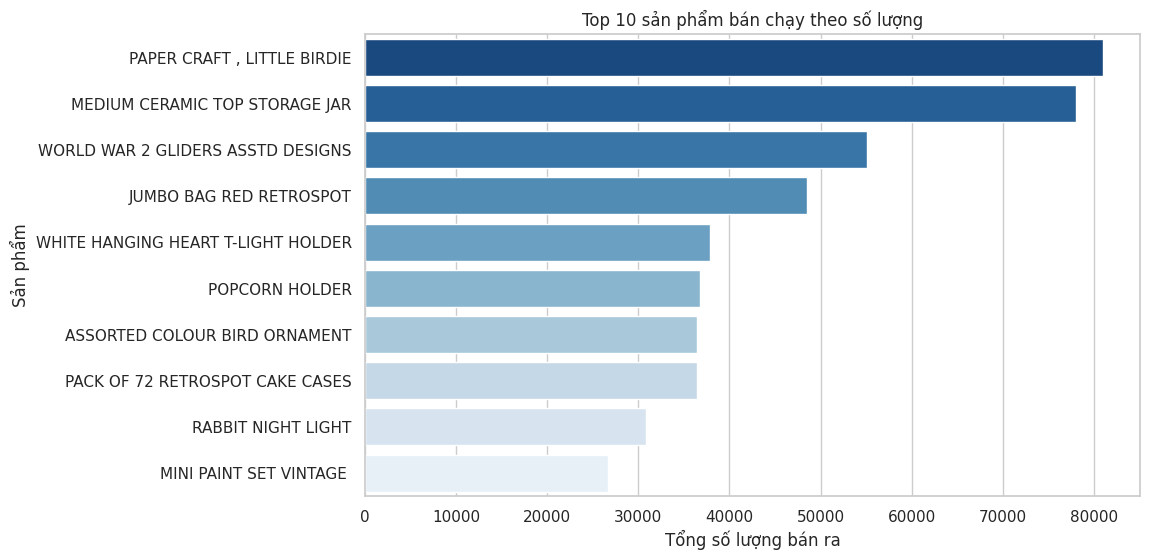

In [ ]:
# Top 10 sản phẩm theo số lượng bán ra
top_products_qty = retail_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products_qty.values, y=top_products_qty.index, palette="Blues_r")
plt.title("Top 10 sản phẩm bán chạy theo số lượng")
plt.xlabel("Tổng số lượng bán ra")
plt.ylabel("Sản phẩm")
plt.show()


####Top sản phẩm bán chạy theo doanh thu

/tmp/ipython-input-1131908332.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_rev.values, y=top_products_rev.index, palette="Greens_r")


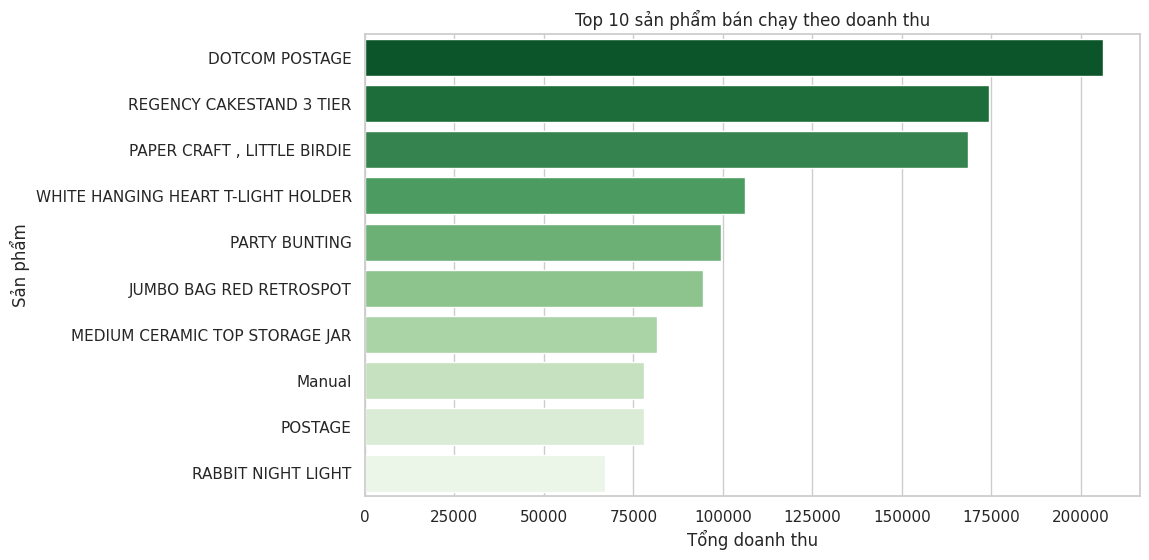

In [ ]:
# Top 10 sản phẩm theo doanh thu
top_products_rev = retail_clean.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products_rev.values, y=top_products_rev.index, palette="Greens_r")
plt.title("Top 10 sản phẩm bán chạy theo doanh thu")
plt.xlabel("Tổng doanh thu")
plt.ylabel("Sản phẩm")
plt.show()


**Nhận xét:**
- Theo số lượng bán ra:

  - Các sản phẩm bán chạy nhất chủ yếu là vật dụng nhỏ, giá rẻ như đồ trang trí, quà tặng, phụ kiện.

  - Những sản phẩm này thường được mua với số lượng lớn trong mỗi đơn hàng.

  - Đây là nhóm sản phẩm tạo nên phần lớn khối lượng giao dịch nhưng không hẳn mang lại doanh thu cao.

- Theo doanh thu:

  - Các sản phẩm mang lại doanh thu cao hơn thường là những mặt hàng có giá trị lớn hoặc bán theo bộ.

  - Một số sản phẩm vừa xuất hiện trong cả Top số lượng và Top doanh thu, chứng tỏ đây là sản phẩm chủ lực.

  - Nhóm sản phẩm doanh thu cao phản ánh đóng góp quan trọng cho lợi nhuận, dù số lượng bán ra ít hơn.

**Kết luận nhỏ:**

- Sự khác biệt giữa Top số lượng và Top doanh thu cho thấy cần có chiến lược phân loại sản phẩm:

- Sản phẩm khối lượng cao → giữ chân khách hàng, thu hút giao dịch.

- Sản phẩm doanh thu cao → tập trung marketing và quản lý tồn kho.

####Phân tích Pareto — Doanh thu tích lũy theo sản phẩm

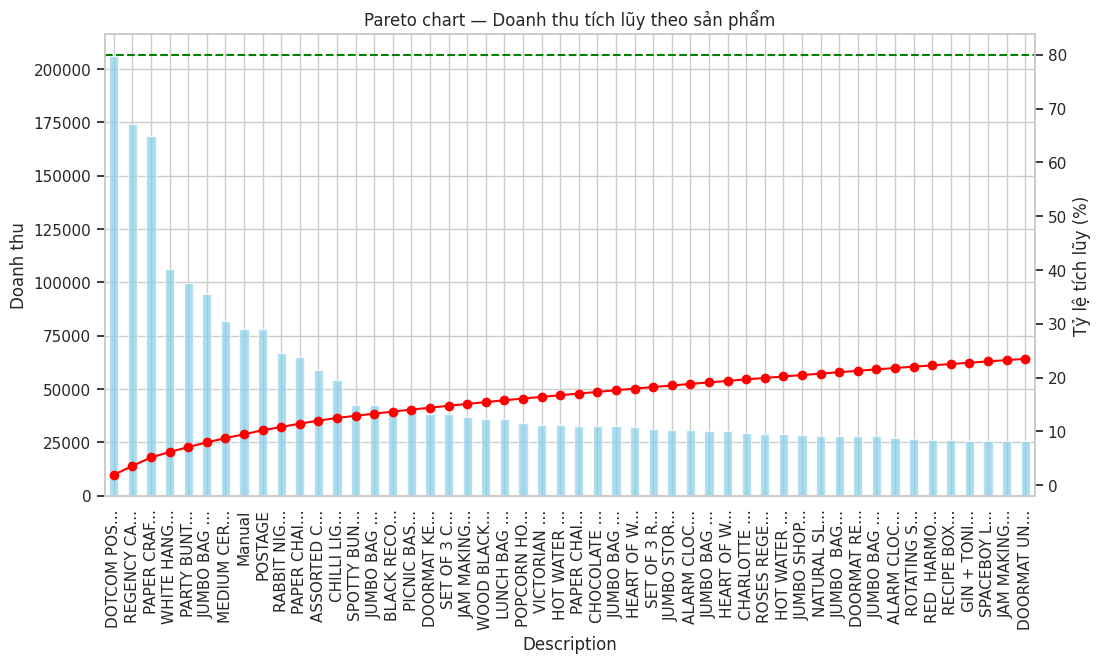

In [ ]:
# Tính doanh thu mỗi sản phẩm
product_revenue = retail_clean.groupby("Description")['Revenue'].sum().sort_values(ascending=False)

# Tính tỷ lệ tích lũy (cumsum %)
cumsum_revenue = product_revenue.cumsum() / product_revenue.sum() * 100

plt.figure(figsize=(12,6))
ax = product_revenue.head(50).plot(kind="bar", color="skyblue", alpha=0.7)  # top 50 sản phẩm
plt.ylabel("Doanh thu")
plt.title("Pareto chart — Doanh thu tích lũy theo sản phẩm")

# Vẽ đường tích lũy
cumsum_revenue.head(50).plot(secondary_y=True, color="red", marker="o", ax=ax)
plt.ylabel("Tỷ lệ tích lũy (%)")
labels = [text[:10] + "..." if len(text) > 10 else text for text in product_revenue.head(50).index]
ax.set_xticklabels(labels, rotation=90)

plt.axhline(80, color="green", linestyle="--")  # đường mức 80%
plt.show()


**Nhận xét:**

- Bảng cho thấy cơ cấu phân bố doanh thu theo giá trị đơn hàng.

- Thường phần lớn đơn hàng rơi vào nhóm 0–50 (các đơn nhỏ, phổ biến).

- Một tỷ lệ nhỏ đơn hàng thuộc nhóm >500, nhưng đóng góp lớn vào tổng doanh thu.

###Heatmap correlation

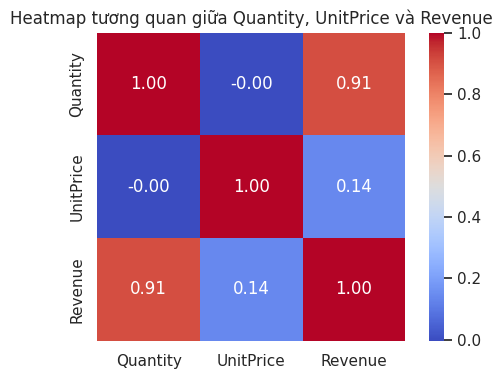

In [ ]:
# Chọn các biến số để phân tích tương quan
corr_vars = retail_clean[['Quantity', 'UnitPrice', 'Revenue']]

# Tính ma trận tương quan
corr_matrix = corr_vars.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Heatmap tương quan giữa Quantity, UnitPrice và Revenue")
plt.show()


**Nhận xét:**

- Quantity – Revenue:

  - Có mối tương quan dương khá mạnh.

  - Điều này dễ hiểu vì Revenue được tính từ Quantity × UnitPrice, nên khi số lượng sản phẩm tăng thì doanh thu cũng tăng.

- UnitPrice – Revenue:

  - Có mối tương quan dương nhưng yếu hơn.

  - Nguyên nhân: phần lớn sản phẩm có giá thấp, chỉ một số ít sản phẩm giá cao tạo ra doanh thu lớn. Do đó, đơn giá không quyết định toàn bộ doanh thu.

- Quantity – UnitPrice:

  - Tương quan gần bằng 0 (rất yếu).

  - Nghĩa là khách hàng mua số lượng nhiều hay ít không phụ thuộc nhiều vào việc sản phẩm đó rẻ hay đắt.

  - Đây là một insight quan trọng: khối lượng mua không tỷ lệ thuận với đơn giá sản phẩm.

**Kết luận nhỏ:**

- Revenue bị chi phối nhiều hơn bởi Quantity so với UnitPrice.

- Khách hàng mua nhiều sản phẩm thường chọn hàng rẻ, nhưng không có quy luật rõ ràng.

- Doanh nghiệp nên tập trung đồng thời vào:

  - Bán nhiều sản phẩm giá thấp để tăng khối lượng giao dịch.

  - Đẩy mạnh sản phẩm giá cao để tối ưu doanh thu.

###Tổng kết

Qua các bước xử lý và trực quan hóa dữ liệu, có thể rút ra một số nhận định chính sau:

**Đặc điểm dữ liệu:**

- Bộ dữ liệu Online Retail chứa nhiều bất thường như Quantity ≤ 0 (trả hàng) và UnitPrice ≤ 0 (khuyến mãi, lỗi nhập liệu).

- Tỷ lệ bất thường tuy nhỏ (<3%) nhưng đủ ảnh hưởng đến phân tích, do đó cần tách riêng để tránh sai lệch.

**Phân phối các biến số chính:**

- Quantity: phần lớn đơn hàng có số lượng nhỏ (1–10 sản phẩm), một số ít đơn hàng số lượng rất lớn.

- UnitPrice: đa số sản phẩm có giá rẻ (<20), xuất hiện một số ngoại lai đơn giá cao.

- TotalPrice/Revenue: phần lớn đơn hàng giá trị thấp, nhưng tồn tại một số đơn hàng rất lớn.

- Tất cả các biến đều có phân phối lệch phải và nhiều ngoại lai.

**Khách hàng và khu vực:**

- United Kingdom chiếm áp đảo trong số lượng giao dịch.

- Các quốc gia khác chỉ chiếm tỷ trọng nhỏ, nhưng vẫn thể hiện sự đa dạng khách hàng quốc tế.

**Thời gian và mùa vụ:**

- Doanh thu có tính mùa vụ rõ rệt, tập trung cao nhất vào cuối năm (tháng 11–12) do ảnh hưởng của Giáng sinh và lễ hội.

- Một số tháng giữa năm có doanh thu thấp hơn, cho thấy nhu cầu không đồng đều.

**Sản phẩm bán chạy:**

- Top theo số lượng: sản phẩm nhỏ, giá rẻ, đóng vai trò hút khách và tạo khối lượng lớn.

- Top theo doanh thu: sản phẩm giá trị cao, đóng góp chính vào lợi nhuận.

- Doanh nghiệp cần có chiến lược khác nhau cho 2 nhóm sản phẩm này.

**Mối quan hệ giữa các biến số:**

- Revenue phụ thuộc nhiều vào Quantity hơn là UnitPrice.

- Quantity và UnitPrice hầu như không tương quan, cho thấy hành vi mua nhiều không nhất thiết liên quan đến việc sản phẩm rẻ hay đắt.

**📌 Kết luận chung:**

- Dữ liệu Online Retail phản ánh rõ đặc điểm kinh doanh bán lẻ trực tuyến: nhiều đơn hàng nhỏ, sản phẩm giá rẻ, doanh thu phụ thuộc mạnh vào mùa vụ.

- Các phân tích EDA không chỉ giúp hiểu dữ liệu mà còn đưa ra các gợi ý quan trọng cho quản lý:

- Quản lý hoàn trả và khuyến mãi tốt hơn.

- Tập trung vào sản phẩm giá trị cao để tối ưu lợi nhuận.

- Tận dụng mùa cao điểm cuối năm bằng các chiến lược marketing phù hợp.